In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False

회귀 신경망  
신경망을 이용해 보스턴 집값을 예측하는 모델을 만들어 본다.

In [2]:
# 일관된 결과값이 나오도록 random seed를 설정한다.
import numpy as np
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

In [3]:
# 데이터 불러오기
from sklearn import datasets # 사이킷런이 제공하는 데이터셋을 사용하기 위해 import 한다.
raw_boston = datasets.load_boston() # 보스턴 집값 데이터를 불러온다.

In [4]:
# 피쳐, 타겟 데이터 저장
X = raw_boston.data # 피쳐 데이터를 저장한다.
y = raw_boston.target # 타겟 데이터를 저장한다.
# 총 13개의 피쳐가 사용되는데, 이는 신경망을 생성할 때 사용된다.
X.shape

(506, 13)

In [5]:
# 타겟 데이터 종류 확인
# 타겟 데이터 종류를 확인함으로써 분류 문제인지 아니면 회귀 문제인지 파악할 수 있고, 분류 문제라면
# 몇 가지 클래스로 구분되는지 알 수 있다.
print(set(y))

{5.0, 6.3, 7.2, 8.8, 7.4, 10.2, 11.8, 12.7, 13.6, 14.5, 15.0, 16.5, 17.5, 18.9, 18.2, 20.4, 21.6, 22.9, 21.7, 24.0, 19.9, 26.6, 26.5, 27.5, 23.1, 27.1, 28.7, 24.7, 30.8, 33.4, 34.7, 34.9, 36.2, 35.4, 31.6, 33.0, 38.7, 33.2, 43.8, 41.3, 37.2, 39.8, 42.3, 48.5, 44.8, 50.0, 46.7, 48.3, 44.0, 48.8, 46.0, 10.5, 11.5, 11.0, 12.5, 12.0, 13.5, 13.0, 14.0, 16.6, 16.0, 16.1, 16.4, 17.4, 17.1, 17.0, 17.6, 17.9, 18.4, 18.6, 18.5, 18.0, 18.1, 19.6, 19.4, 19.5, 19.1, 19.0, 20.0, 20.5, 20.9, 20.6, 20.1, 21.0, 21.4, 21.5, 21.9, 21.1, 22.0, 22.5, 22.6, 22.4, 22.1, 23.4, 23.5, 23.9, 23.6, 23.0, 24.1, 24.6, 24.4, 24.5, 25.0, 25.1, 26.4, 27.0, 27.9, 28.0, 28.4, 28.1, 28.5, 28.6, 29.4, 29.9, 29.6, 29.1, 29.0, 30.5, 30.1, 31.1, 31.5, 31.0, 32.5, 32.0, 32.9, 32.4, 32.2, 33.3, 33.8, 33.1, 32.7, 8.4, 34.6, 35.2, 35.1, 10.4, 10.9, 7.0, 36.4, 36.0, 36.5, 36.1, 11.9, 37.9, 37.0, 37.6, 37.3, 13.9, 13.4, 14.4, 14.9, 15.4, 8.5, 41.7, 42.8, 43.1, 43.5, 45.4, 9.5, 8.3, 8.7, 9.7, 10.8, 11.3, 11.7, 12.3, 12.8, 13.2, 13.

In [6]:
# 트레이닝, 테스트 데이터 분할
from sklearn.model_selection import train_test_split # 트레이닝, 테스트 데이터 분할을 위해 import 한다.
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state=0) # 트레이닝 데이터와 테스트 데이터로 분할한다.
print(X_tn.shape, y_tn.shape, X_te.shape, y_te.shape)

(379, 13) (379,) (127, 13) (127,)


In [7]:
# 시퀀스 API 신경망 생성
from tensorflow.keras.models import Sequential # 시퀀스 API 신경망을 생성하기 위해 import 한다.
from tensorflow.keras.layers import Dense # 신경망에 추가할 완전 연결 layer를 생성하기 위해 import 한다.

# 회귀 신경망은 모델 학습에 사용되는 피쳐 개수(n)를 지정한다.
n = X_tn.shape[1]
print(f'피쳐 개수: {n}')
epochs = 50

# Sequential 객체를 선언 후 Sequential 모델에 add() 메소드로 layer를 추가해서 쌓아올린다.
model = Sequential() # 신경망 모델을 만든다.
# input_dim 속성으로 입력 데이터(피쳐)의 차원, units 속성으로 layer의 출력 차원, activation 속성으로
# 활성화 함수를 지정한다.
model.add(Dense(input_dim=n, units=20, activation='relu')) # 신경망 모델에 입력 layer를 추가한다.
# 분류 신경망은 구분해야 할 클래스 개수만큼 출력 노드 개수(units)를 지정했지만 회귀 신경경망은 1건을 예측만
# 하기때문에 출력 노드 개수를 1로 지정한다.
# 회귀 문제를 풀 때 최종 활성화 함수는 활성화 함수 중 항등(선형) 함수 사용해야 하는데, 코드 상에서 최종 활성화
# 함수를 지정하지 않으면 기본값이 항등 함수가 적용된다.
model.add(Dense(units=1)) # 신경망 모델에 출력 layer를 추가한다.
model.summary()

피쳐 개수: 13
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                280       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 모델 컴파일
# 회귀 신경망은 loss 속성에 손실(비용, 오차)함수를 지정할 때 mean_squared_error를 지정하고,
# optimizer 속성에 최적화 함수(일반적으로 adam)를 지정한다.
# metrics 속성에 평가 기준을 지정한다.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [9]:
# 신경망 학습
# 트레이닝 피쳐 데이터(X_tn)와 트레이닝 데이터에 따른 타겟 데이터(y_tn)를 지정하고 epochs 속성에
# epoch와 batch_size 속성에 batch_size를 지정한다.
hist = model.fit(X_tn, y_tn, epochs=epochs, batch_size=5)

Epoch 1/50
76/76 [==============================] - 0s 914us/step - loss: 13224.2305 - mean_squared_error: 13224.2305
Epoch 2/50
76/76 [==============================] - 0s 893us/step - loss: 946.0072 - mean_squared_error: 946.0072
Epoch 3/50
76/76 [==============================] - 0s 884us/step - loss: 236.4927 - mean_squared_error: 236.4927
Epoch 4/50
76/76 [==============================] - 0s 902us/step - loss: 160.2282 - mean_squared_error: 160.2282
Epoch 5/50
76/76 [==============================] - 0s 833us/step - loss: 137.3969 - mean_squared_error: 137.3969
Epoch 6/50
76/76 [==============================] - 0s 900us/step - loss: 119.2652 - mean_squared_error: 119.2652
Epoch 7/50
76/76 [==============================] - 0s 895us/step - loss: 106.7322 - mean_squared_error: 106.7322
Epoch 8/50
76/76 [==============================] - 0s 893us/step - loss: 95.8947 - mean_squared_error: 95.8947
Epoch 9/50
76/76 [==============================] - 0s 819us/step - loss: 88.6654 - me

In [10]:
# 신경망 학습 평가
print(model.evaluate(X_tn, y_tn)) # 트레이닝 피쳐 데이터를 트레이닝 피처 타겟 데이터와 학습 평가
print(model.evaluate(X_te, y_te)) # 테스트 피쳐 데이터를 테스트 피처 타겟 데이터와 학습 평가

12/12 [==============================] - 0s 2ms/step - loss: 33.1847 - mean_squared_error: 33.1847
[33.184661865234375, 33.184661865234375]
4/4 [==============================] - 0s 1ms/step - loss: 47.0629 - mean_squared_error: 47.0629
[47.06294250488281, 47.06294250488281]


In [14]:
# 정확도 및 손실 정도 시각화 준비
epoch = np.arange(1, epochs + 1)
# print(epoch)
mse = hist.history['mean_squared_error'] # 모델 실행 결과에서 정확도만 얻어온다.
# print(mse)
loss = hist.history['loss'] # 모델 실행 결과에서 오차만 얻어온다.
# print(loss)

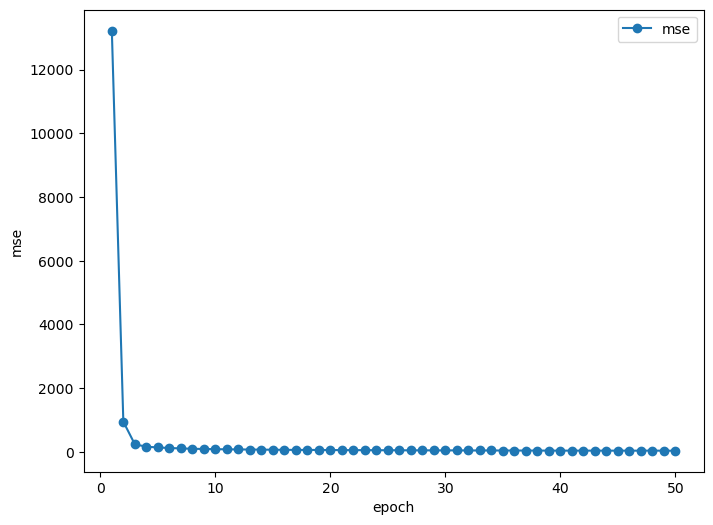

In [15]:
# MSE 학습 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(epoch, mse, label='mse', marker='o')
plt.xlabel('epoch')
plt.ylabel('mse')
plt.legend()
plt.show()
# 정확도 확인 결과 에포크 진행 단계별로 MSE가 감소하는 것을 볼 수 있다.

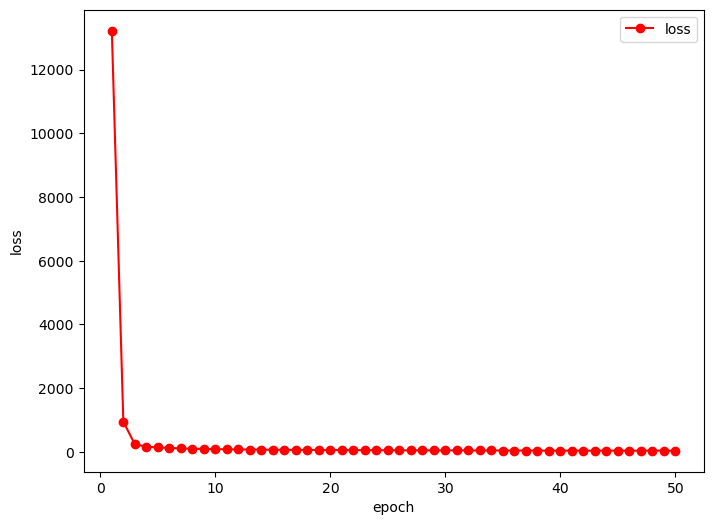

In [17]:
# MSE 학습 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(epoch, loss, 'r', label='loss', marker='o')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()
# 손실 확인 결과 에포크 진행 단계별로 손실이 점차 낮아지는 것을 볼 수 있다.

In [27]:
# 실제값, 예측값 데이터프레임 생성
pred_y = model.predict(X_te).flatten()
print(pred_y)

4/4 [==============================] - 0s 2ms/step
[26.519539  23.977924  26.071924  13.947469  24.573595  24.120018
 23.931797  30.123907  18.933132  11.727341   4.7048097 12.828777
 18.476871   8.709119  29.18116   28.988186  24.644285  28.739672
 26.000301  24.957413  26.04909   20.93634   23.66595   29.871609
 24.294094  17.117825  21.629337  15.729871  33.406     23.678463
 17.516846  21.460081  23.717653  24.308395  27.893084  20.94902
 10.399341  24.326988  14.289198  14.415623  22.663683  21.819965
 26.026077  17.460846  29.775818  30.880594  17.948322  19.207525
 12.57229   26.772194  11.85322   21.592663  21.519419  29.579077
 13.639606  19.975983  22.28108   23.496902  13.827341  22.041035
 29.44554   21.11295   27.774818  26.857475  19.68822   30.047554
 19.204985  17.166576  15.442866  21.484337  24.332253  25.560917
 28.785524  30.058136  24.99879    8.797082  27.385124  22.27449
 28.21265   24.059689  24.69448   23.550766  21.466206  28.901318
 28.676     24.863369  26.1

In [28]:
import pandas as pd
result_df = pd.DataFrame(pred_y, columns=['predict_val'])
result_df['real_val'] = y_te
result_df

,predict_val,real_val
0,26.519539,22.6
1,23.977924,50.0
2,26.071924,23.0
3,13.947469,8.3
4,24.573595,21.2
...,...,...
122,24.520752,19.4
123,24.838326,21.2
124,23.251846,20.3
125,22.787270,18.8


In [33]:
# 예측값을 기준으로 데이터프레임을 오름차순으로 정렬한다.
df_sort = result_df.sort_values(['predict_val'], ascending=True)
df_sort

,predict_val,real_val
116,3.484766,8.4
10,4.704810,8.8
96,6.614229,13.8
106,6.829836,10.4
13,8.709119,10.5
...,...,...
120,30.599846,30.5
45,30.880594,21.6
28,33.405998,38.7
126,39.744465,33.4


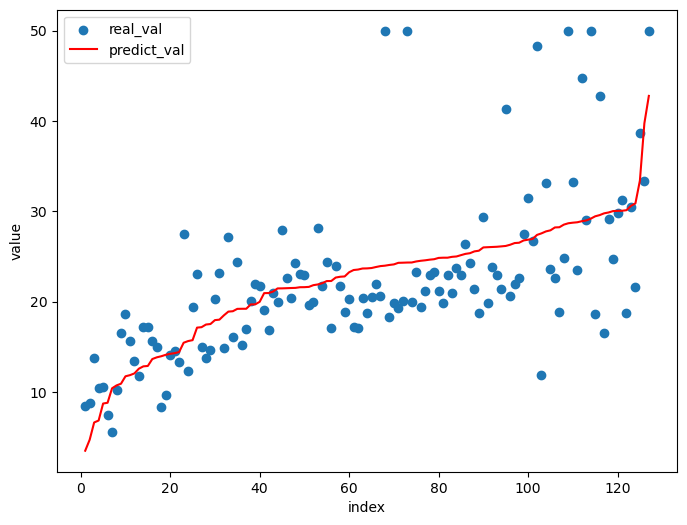

In [37]:
# 예측값, 실제값 비교 그래프
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
idx = np.arange(1, len(df_sort) + 1)
plt.scatter(idx, df_sort['real_val'], label='real_val', marker='o')
plt.plot(idx, df_sort['predict_val'], label='predict_val', color='r')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()